<a href="https://colab.research.google.com/github/LorenzoLaCorte/ML-basics-python/blob/main/GridSearch%2C_Lasso_and_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crime

In [27]:
#CRIME
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

ix = range(0,247)
iy = 247 # last column is the one to predict  
L = pd.read_csv('/content/drive/MyDrive/MLDA/VariousDatasets/CRIME/L.csv') # learning matrix
T = pd.read_csv('/content/drive/MyDrive/MLDA/VariousDatasets/CRIME/T.csv') # test matrix
L = L.to_numpy()
T = T.to_numpy()
XL = L[:,ix]
YL = L[:,iy]
XT = T[:,ix]
YT = T[:,iy]

# Normalization Step
from sklearn import preprocessing

scalerX = preprocessing.MinMaxScaler()
XL = scalerX.fit_transform(XL)
XT = scalerX.transform(XT)

# KernelRidge Model
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV

# define the grid which will be useful to search the best combination of these parameters
grid = {'alpha': np.logspace(-4,3,5),
        'kernel': ['rbf'],
        'gamma': np.logspace(-4,3,5)}

# Finding the best parameters
# estimator: method we want to use, parameter_grid: grid, scoring: method to compute the score, cv: percentange of data for validation
MS = GridSearchCV(estimator = KernelRidge(),
                  param_grid = grid,
                  scoring = 'neg_mean_absolute_error',
                  cv = 10,
                  verbose = 0)

H = MS.fit(XL, YL)

0.08063487861180049


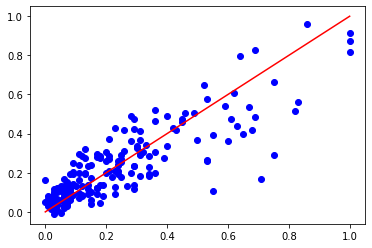

In [28]:
# Now let's use the best hyperparameters I found in the previous step
M = KernelRidge(alpha = H.best_params_['alpha'],
                kernel = H.best_params_['kernel'], 
                gamma = H.best_params_['gamma'])

M.fit(XL,YL)

# Evaluate the performance of the model: predict on the test set
# To have an idea of the quality of the model we use a scatter 
YP = M.predict(XT)
err = np.mean(np.abs(YT-YP))
print(err)
fig, ax = plt.subplots()
ax.plot(YT,YP,'bo')
tmp = [np.min(YT),np.max(YT)]
ax.plot(tmp,tmp,'r')


# Mnist

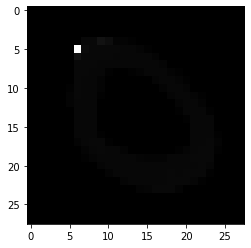

In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from random import sample

d1 = 0
d2 = 1

D1 = pd.read_csv('drive/MyDrive/MLDA/VariousDatasets/MNIST/Mnist%d.csv' %d1)
D2 = pd.read_csv('drive/MyDrive/MLDA/VariousDatasets/MNIST/Mnist%d.csv' %d2)
D1 = D1.to_numpy()
D2 = D2.to_numpy()

nl = 100
nt = 1000

# sample digit one and digit two
i = sample(range(D1.shape[0]),nl+nt)
D1 = D1[i,:]
i = sample(range(D2.shape[0]),nl+nt)
D2 = D2[i,:]

# learning set concat the matrix of the first digit with the first n sample of the digit two
XL = np.concatenate((D1[range(0,nl),:],D2[range(0,nl),:]),axis=0)
YL = np.append(-np.ones(nl),np.ones(nl))
XT = np.concatenate((D1[range(nl,nl+nt),:],D2[range(nl,nl+nt),:]),axis=0)
YT = np.append(-np.ones(nt),np.ones(nt))

# normalize the dataset
scalerX = preprocessing.MinMaxScaler()
XL = scalerX.fit_transform(XL)
XT = scalerX.transform(XT)

# visualize the dataset 
i = 0 # 0 is a 0, 1000 is a 1
fig = plt.figure()
tmp = np.reshape(XT[i,:],(28,28))
plt.imshow(tmp,cmap='gray')

In [30]:
# in classification the best way to visualize the quality of the model is the confusion matrix
# who tells all the possibilities: on the diagonal how many are predicted wrong
from sklearn.linear_model import Ridge
from sklearn.metrics import confusion_matrix

alpha = .01
M = Ridge(alpha = alpha)
M.fit(XL,YL)
YP = M.predict(XT)
YP[YP <= 0] = -1
YP[YP  > 0] = +1
confusion_matrix(YT,YP)

array([[972,  28],
       [  7, 993]])

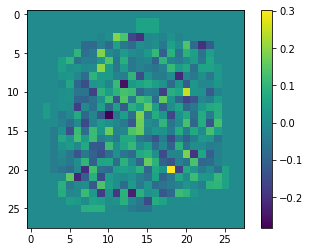

In [31]:
fig = plt.figure()
tmp = np.reshape(M.coef_,(28,28))
plt.imshow(tmp)
plt.colorbar()

## Lasso

Let's try to see the difference when using another algorithm:
Lasso: norm1 of the weight -> faster solution

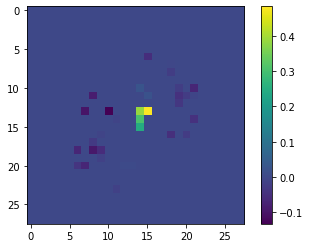

In [32]:
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix

alpha = .01
M = Lasso(alpha = alpha)
M.fit(XL,YL)
YP = M.predict(XT)
YP[YP <= 0] = -1
YP[YP  > 0] = +1
confusion_matrix(YT,YP)
fig = plt.figure()
tmp = np.reshape(M.coef_,(28,28))
plt.imshow(tmp)
plt.colorbar()

This model is very interpretable: at the center is higher probable that it's a 1 (yellow).
This model is although more vulnerable: if I change the center it will fail.

## Predict Every Digit

In [33]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from random import sample

folder = 'drive/MyDrive/MLDA/VariousDatasets/MNIST/'
nl = 30
nt = 100

# use the same process as before but for all the ten digits
for i in range(0,10):
  file = folder + 'Mnist%d.csv' %i
  D = pd.read_csv(file).to_numpy()
  j = sample(range(D.shape[0]),nl+nt)
  D = D[j,:]
  if (i == 0):
    XL = D[range(0,nl),:]
    YL = i*np.ones(nl)
    XT = D[range(nl,nl+nt),:]
    YT = i*np.ones(nt)
  else:
    XL = np.concatenate((XL,D[range(0,nl),:]),axis=0)
    YL = np.append(YL,i*np.ones(nl))
    XT = np.concatenate((XT,D[range(nl,nl+nt),:]),axis=0)
    YT = np.append(YT,i*np.ones(nt))

# normalize the data
scalerX = preprocessing.MinMaxScaler()
XL = scalerX.fit_transform(XL)
XT = scalerX.transform(XT)

In [34]:
# construct the grid search that is able to find the optimal parameter
# we use SVC as estimator
# we have also to change the scoring because we are in classification

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid = {'C': np.logspace(-4,3,5),
        'kernel': ['linear']}

MS = GridSearchCV(estimator = SVC(),
                  param_grid = grid,
                  scoring = 'balanced_accuracy',
                  cv = 10,
                  verbose = 0)
H = MS.fit(XL,YL)

M = SVC(C = H.best_params_['C'],
        kernel = H.best_params_['kernel'])
M.fit(XL,YL)

SVC(C=0.31622776601683794, kernel='linear')

In [35]:
# then we predict on the testset evaluating the model
from sklearn.metrics import confusion_matrix

YP = M.predict(XT)
confusion_matrix(YT,YP)

array([[97,  0,  0,  0,  0,  0,  1,  2,  0,  0],
       [ 0, 93,  4,  0,  0,  2,  0,  0,  1,  0],
       [ 3,  8, 80,  4,  1,  1,  0,  0,  2,  1],
       [ 1,  0,  2, 76,  0,  9,  2,  3,  5,  2],
       [ 0,  1,  0,  0, 86,  0,  0,  1,  0, 12],
       [ 2,  6,  0,  5,  1, 80,  0,  0,  4,  2],
       [ 0,  2,  0,  0,  1,  1, 96,  0,  0,  0],
       [ 0,  5,  2,  0,  3,  1,  0, 88,  0,  1],
       [ 2,  9,  4,  5,  1,  3,  0,  0, 70,  6],
       [ 0,  0,  0,  1,  5,  2,  1,  5,  0, 86]])

for example: the model makes mistakes on the 3 because it's easy to confuse it with the 8 
--> for making this model better I can use more data 
    (more accurate but takes more time)
The library solves the problem in the dual formulation: the time scale up quadratically with the dimension of the data.


# Random Forest
This algorithm doesn't suffer from hyperparameter selection.
The number of estimator is not an hyperparameter because the more, the better.

from sklearn.ensemble import RandomForestClassifier
M = RandomForestClassifier(n_estimators = 1000)

In [36]:
from sklearn.ensemble import RandomForestClassifier
M = RandomForestClassifier(n_estimators = 1000)
M.fit(XL,YL)
YP = M.predict(XT)
confusion_matrix(YT,YP)

array([[99,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0, 91,  6,  1,  0,  1,  0,  0,  1,  0],
       [ 5,  5, 82,  4,  1,  0,  1,  1,  0,  1],
       [ 0,  0,  1, 79,  1,  8,  3,  2,  2,  4],
       [ 0,  1,  1,  0, 84,  0,  1,  1,  0, 12],
       [ 1,  5,  0,  2,  1, 77,  0,  0,  1, 13],
       [ 2,  2,  0,  0,  1,  0, 95,  0,  0,  0],
       [ 0,  6,  1,  0,  4,  0,  0, 86,  0,  3],
       [ 2,  6,  4,  4,  1,  3,  1,  1, 69,  9],
       [ 0,  0,  1,  0,  3,  2,  0,  5,  0, 89]])

## Decision Tree
When we use decision tree we don't have to normalize because we use averages

In this case we have to tune the hyperparameters:
- max_depth


0.10404613926417139


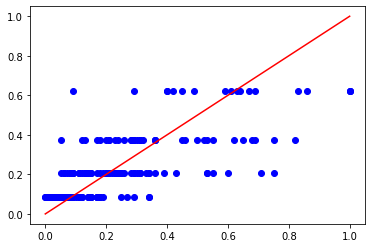

In [41]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

ix = range(0,247)
iy = 247
L = pd.read_csv('drive/MyDrive/MLDA/VariousDatasets/CRIME/L.csv')
T = pd.read_csv('drive/MyDrive/MLDA/VariousDatasets/CRIME/T.csv')
L = L.to_numpy()
T = T.to_numpy()
XL = L[:,ix]
YL = L[:,iy]
XT = T[:,ix]
YT = T[:,iy]

M = DecisionTreeRegressor(max_depth = 2)
M.fit(XL,YL)

YP = M.predict(XT)
print(np.mean(np.abs(YP-YT)))

fig, ax = plt.subplots()
ax.plot(YT,YP,'bo')
tmp = [np.min(YT),np.max(YT)]
ax.plot(tmp,tmp,'r')

The prediction are in horizontal lines: 2^depth levels (lines)

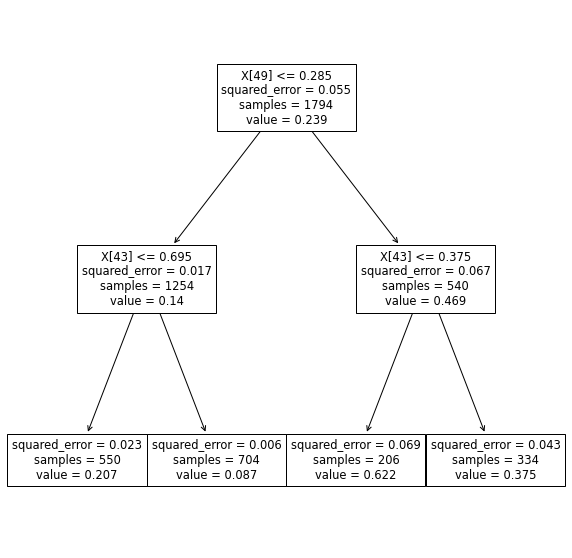

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(M)